In [31]:
%pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [32]:
%pip install matplotlib



Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv(r'C:\Users\ADMIN\OneDrive\Documents\sales_forecasting_project\data\raw\Sales_data.csv')

In [35]:
print(df.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


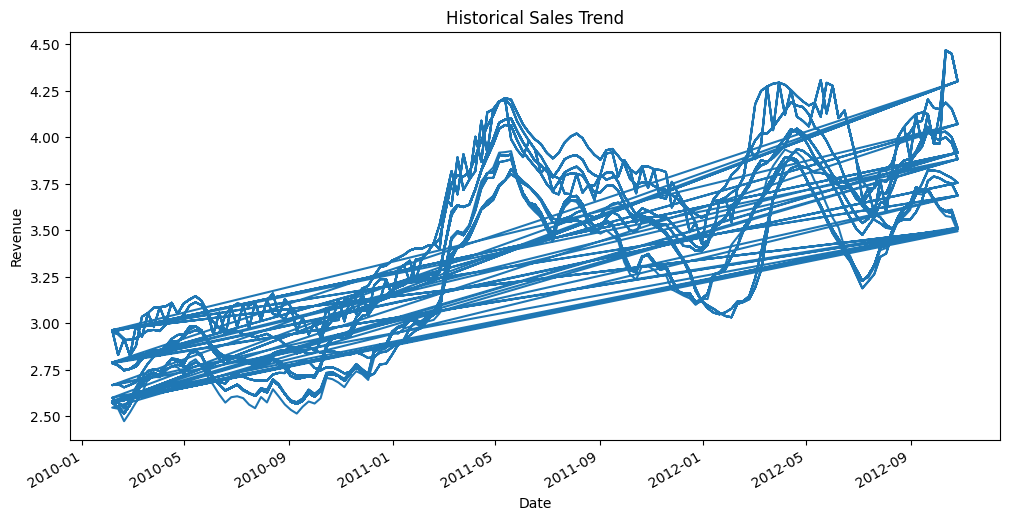

In [37]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date')['Fuel_Price'].plot(figsize=(12,6))
plt.title("Historical Sales Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.savefig("../reports/plots/Historical_sales_trend.png")
plt.show()

In [38]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [39]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [40]:
import seaborn as sns

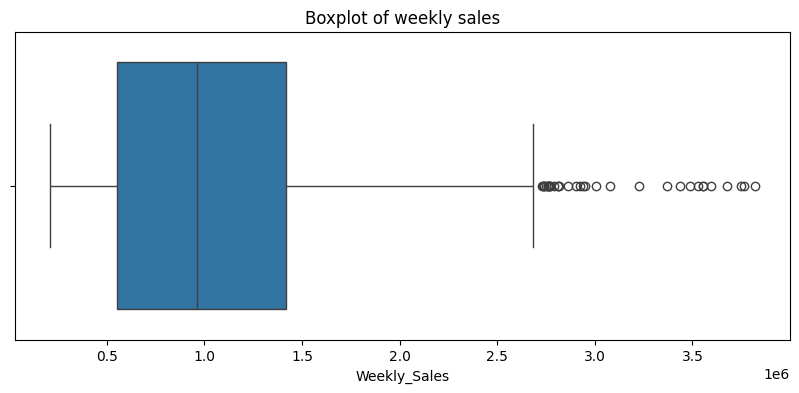

In [ ]:

plt.figure(figsize=(10,4))
sns.boxplot(x=df['Weekly_Sales'])
plt.title("Boxplot of weekly sales")
plt.savefig("../reports/plots/outliers_boxplot.png")
plt.show()

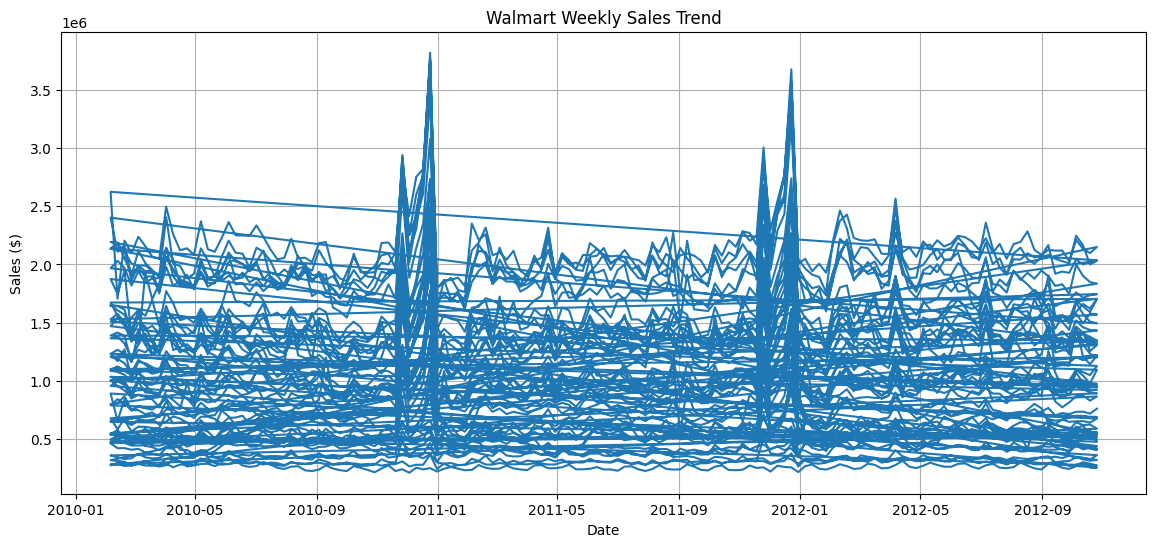

In [42]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Weekly_Sales'], label='Weekly Sales')
plt.title("Walmart Weekly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales ($)")
plt.grid()
plt.savefig("../reports/plots/sales_trend.png")
plt.show()


Average Sales on Holidays: $1,122,887.89
Average Sales on Non-Holidays: $1,041,256.38


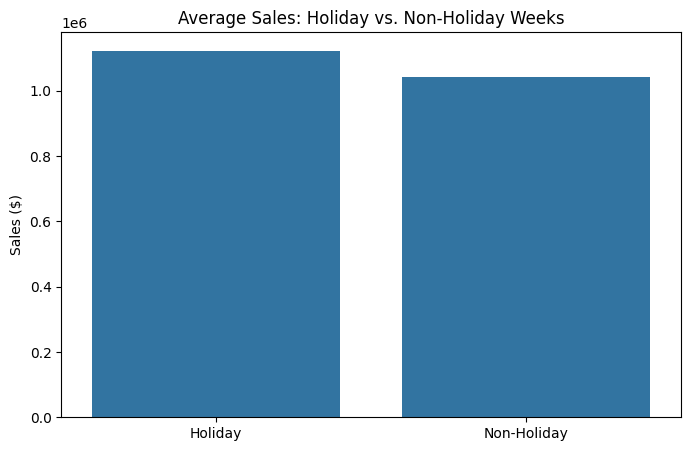

In [ ]:
holiday_sales = df[df['Holiday_Flag'] == 1]['Weekly_Sales']
normal_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales']

print(f"\nAverage Sales on Holidays: ${holiday_sales.mean():,.2f}")
print(f"Average Sales on Non-Holidays: ${normal_sales.mean():,.2f}")


plt.figure(figsize=(8, 5))
sns.barplot(x=['Holiday', 'Non-Holiday'], y=[holiday_sales.mean(), normal_sales.mean()])
plt.title("Average Sales: Holiday vs. Non-Holiday Weeks")
plt.ylabel("Sales ($)")
plt.savefig("../reports/plots/holiday_impact.png")
plt.show()

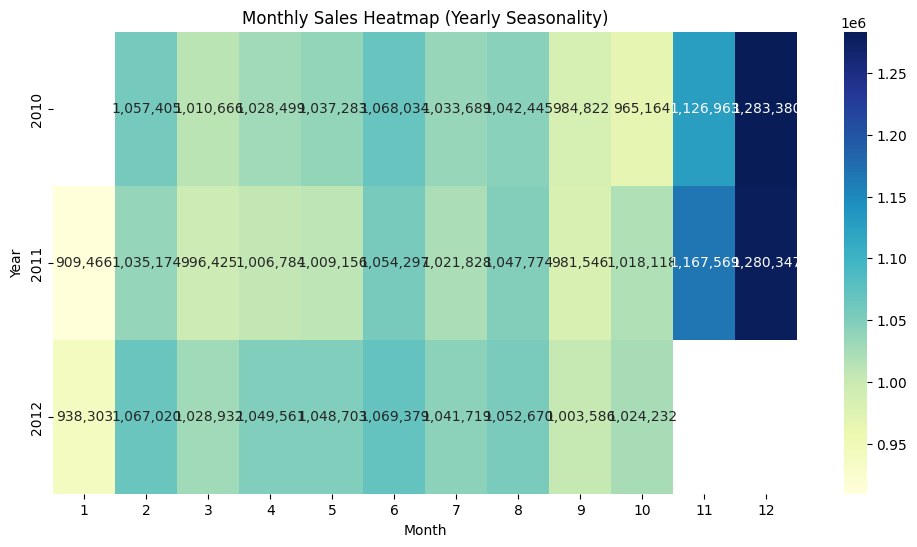

In [ ]:

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


monthly_sales = df.groupby(['Year', 'Month'])['Weekly_Sales'].mean().unstack()


plt.figure(figsize=(12, 6))
sns.heatmap(monthly_sales, cmap="YlGnBu", annot=True, fmt=",.0f")
plt.title("Monthly Sales Heatmap (Yearly Seasonality)")
plt.savefig("../reports/plots/monthly_heatmap.png")
plt.show()

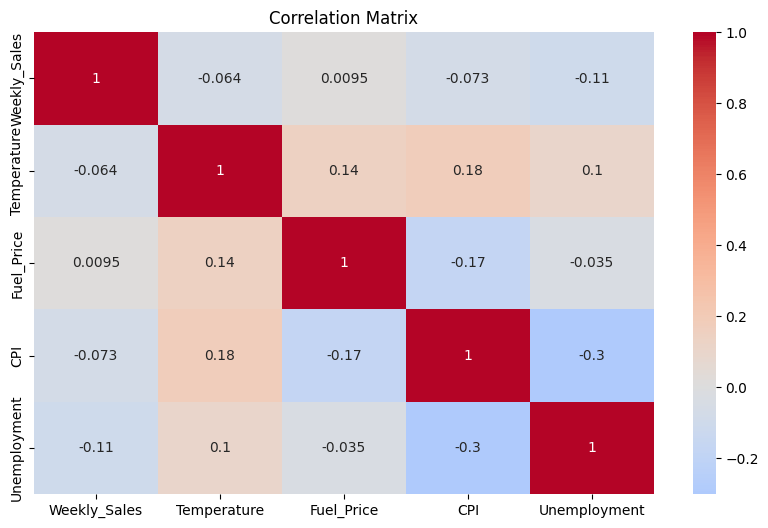

In [ ]:

numeric_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
corr_matrix = df[numeric_cols].corr()


plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.savefig("../reports/plots/correlation_heatmap.png")
plt.show()

In [47]:
df.to_csv("../data/processed/cleaned_sales_data.csv",index = False)